In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.chdir("..")
os.getcwd()

'/home/martin/Desktop/10-Academy/week-8/Causal-Inference'

In [3]:
# Load datasets
completed_orders = pd.read_csv('data/nb.csv')
delivery_requests = pd.read_csv('data/driver_locations_during_request.csv')

# Inspect the first few rows of each dataset
print(completed_orders.head())
print(delivery_requests.head())


   Trip ID                         Trip Origin  \
0   391996  6.508813001668548,3.37740316890347   
1   391997                 6.4316714,3.4555375   
2   391998         6.631679399999999,3.3388976   
3   391999         6.572757200000001,3.3677082   
4   392001                 6.6010417,3.2766339   

                  Trip Destination      Trip Start Time        Trip End Time  
0      6.650969799999999,3.3450307  2021-07-01 07:28:04  2021-07-01 07:29:37  
1  6.4280814653326,3.4721885847586  2021-07-01 06:38:04  2021-07-01 07:07:28  
2      6.508324099999999,3.3590397  2021-07-01 06:21:02  2021-07-01 07:02:23  
3      6.584881099999999,3.3614073  2021-07-01 07:16:07  2021-07-01 07:29:42  
4              6.4501069,3.3916154  2021-07-01 09:30:59  2021-07-01 09:34:36  
   id  order_id  driver_id driver_action       lat       lng  created_at  \
0   1    392001     243828      accepted  6.602207  3.270465         NaN   
1   2    392001     243588      rejected  6.592097  3.287445         NaN 

In [4]:
# Check for missing values
print(completed_orders.info())
print(delivery_requests.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Trip ID           536020 non-null  int64 
 1   Trip Origin       536020 non-null  object
 2   Trip Destination  536020 non-null  object
 3   Trip Start Time   534369 non-null  object
 4   Trip End Time     536019 non-null  object
dtypes: int64(1), object(4)
memory usage: 20.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557740 entries, 0 to 1557739
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id             1557740 non-null  int64  
 1   order_id       1557740 non-null  int64  
 2   driver_id      1557740 non-null  int64  
 3   driver_action  1557740 non-null  object 
 4   lat            1557740 non-null  float64
 5   lng            1557740 non-null  float64
 6   created_at     0 non

In [5]:
# Handling missing values in completed_orders
print(completed_orders.isnull().sum())

Trip ID                0
Trip Origin            0
Trip Destination       0
Trip Start Time     1651
Trip End Time          1
dtype: int64


In [6]:
# Drop rows with missing Trip Start Time and Trip End Time as these are critical for our analysis
completed_orders = completed_orders.dropna(subset=['Trip Start Time', 'Trip End Time'])

In [7]:
print(completed_orders.isnull().sum())

Trip ID             0
Trip Origin         0
Trip Destination    0
Trip Start Time     0
Trip End Time       0
dtype: int64


In [8]:
completed_orders.head(10)

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23
3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36
5,392005,"6.565087699999999,3.3844415","6.499696300000001,3.3509075",2021-07-01 10:53:36,2021-07-01 11:27:51
6,392009,"6.6636484,3.3082058","6.6185421,3.301634",2021-07-01 06:39:51,2021-07-01 07:41:12
7,392013,"6.4308171,3.4341552","6.435460000000001,3.4846547",2021-07-01 08:44:09,2021-07-01 09:19:11
8,392014,"6.499156300000001,3.3585173","6.4280911,3.5157172",2021-07-01 06:43:07,2021-07-01 07:27:24
9,392017,"6.535043099999999,3.3316238","6.500039999999999,3.3248596",2021-07-01 06:49:37,2021-07-01 07:30:14


In [9]:
#Handling mising values in delivery_requests
print(delivery_requests.isnull().sum())

id                     0
order_id               0
driver_id              0
driver_action          0
lat                    0
lng                    0
created_at       1557740
updated_at       1557740
dtype: int64


In [10]:
# Drop columns created_at and updated_at as these are critical for our analysis
delivery_requests = delivery_requests.drop(columns=['created_at', 'updated_at'])

In [11]:
print(delivery_requests.isnull().sum())

id               0
order_id         0
driver_id        0
driver_action    0
lat              0
lng              0
dtype: int64


In [12]:
completed_orders['Trip Start Time']= pd.to_datetime(completed_orders['Trip Start Time'])
completed_orders['Trip End Time']= pd.to_datetime(completed_orders['Trip End Time'])


In [13]:
# Calculate trip duration
completed_orders['Trip Duration'] = (completed_orders['Trip End Time'] - completed_orders['Trip Start Time']).dt.total_seconds() / 60  # in minutes

In [14]:
# Detect outliers in Trip Duration using IQR
Q1 = completed_orders['Trip Duration'].quantile(0.25)
Q3 = completed_orders['Trip Duration'].quantile(0.75)
IQR = Q3 - Q1


In [15]:
#Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [16]:
# Filter out outliers
completed_orders = completed_orders[(completed_orders['Trip Duration'] >= lower_bound) & (completed_orders['Trip Duration'] <= upper_bound)]

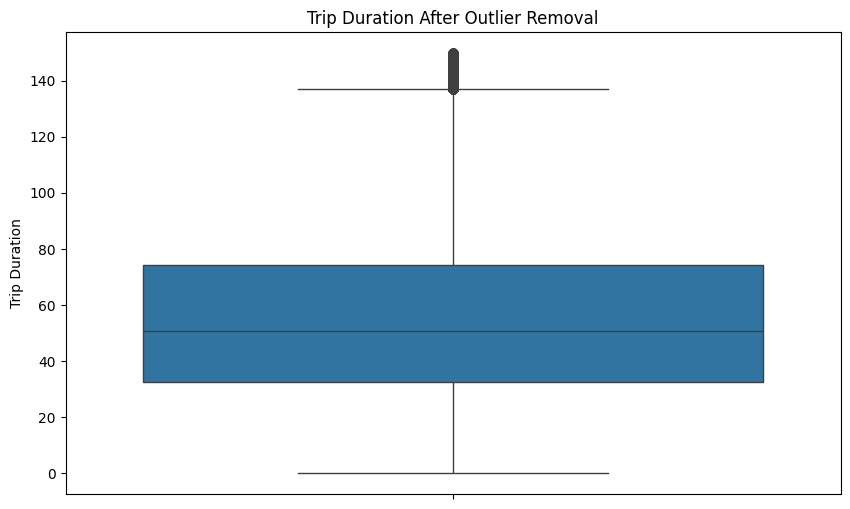

In [17]:
# Verify the removal of outliers
plt.figure(figsize=(10, 6))
sns.boxplot(completed_orders['Trip Duration'])
plt.title('Trip Duration After Outlier Removal')
plt.show()

In [18]:
# Extracting additional time-based features
completed_orders['Trip Start Hour'] = completed_orders['Trip Start Time'].dt.hour
completed_orders['Trip Start Day'] = completed_orders['Trip Start Time'].dt.day
completed_orders['Trip Start Month'] = completed_orders['Trip Start Time'].dt.month
completed_orders['Trip Start Weekday'] = completed_orders['Trip Start Time'].dt.weekday

# Determine if the trip was on a weekend
completed_orders['Is Weekend'] = completed_orders['Trip Start Weekday'].apply(lambda x: 1 if x >= 5 else 0)  # 1 for weekend, 0 for weekday


# Fetch weather data (using a mock function for demonstration purposes)
def get_weather_data_mock(date):
    # Mock function to simulate weather data
    # In practice, you would use an actual API to get historical weather data
    return 'No-Rain' if date.day % 2 == 0 else 'Rain'

completed_orders['Weather'] = completed_orders['Trip Start Time'].apply(get_weather_data_mock)

# Example holidays (to be expanded as necessary)
holidays = ['2023-01-01', '2023-04-07', '2023-12-25']
completed_orders['Is Holiday'] = completed_orders['Trip Start Time'].dt.date.astype(str).isin(holidays)

print(completed_orders.head())


   Trip ID                         Trip Origin  \
0   391996  6.508813001668548,3.37740316890347   
1   391997                 6.4316714,3.4555375   
2   391998         6.631679399999999,3.3388976   
3   391999         6.572757200000001,3.3677082   
4   392001                 6.6010417,3.2766339   

                  Trip Destination     Trip Start Time       Trip End Time  \
0      6.650969799999999,3.3450307 2021-07-01 07:28:04 2021-07-01 07:29:37   
1  6.4280814653326,3.4721885847586 2021-07-01 06:38:04 2021-07-01 07:07:28   
2      6.508324099999999,3.3590397 2021-07-01 06:21:02 2021-07-01 07:02:23   
3      6.584881099999999,3.3614073 2021-07-01 07:16:07 2021-07-01 07:29:42   
4              6.4501069,3.3916154 2021-07-01 09:30:59 2021-07-01 09:34:36   

   Trip Duration  Trip Start Hour  Trip Start Day  Trip Start Month  \
0       1.550000                7               1                 7   
1      29.400000                6               1                 7   
2      41.350000 

In [19]:
completed_orders.to_csv('features_completed_orders.csv', index=False)


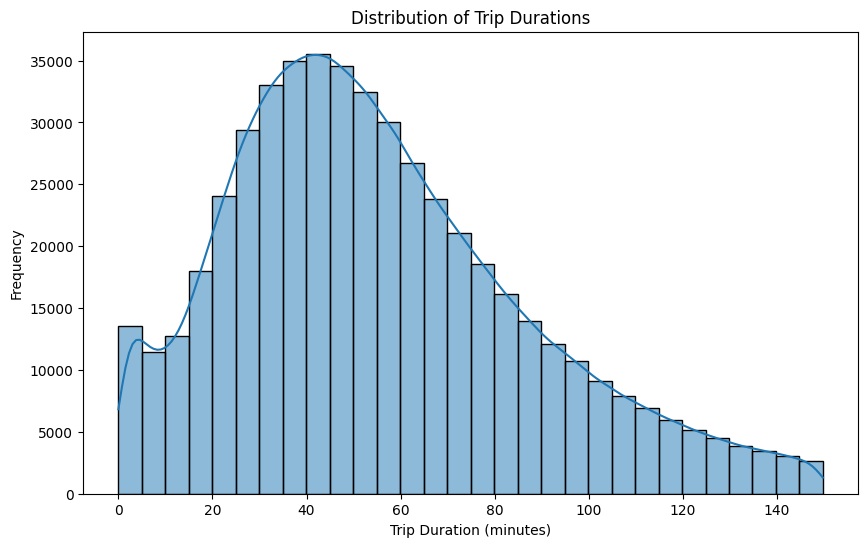

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(completed_orders['Trip Duration'], bins=30, kde=True)
plt.title('Distribution of Trip Durations')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


In [21]:
import numpy as np

def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    r = 6371  # Radius of Earth in kilometers
    return c * r

# Split latitude and longitude for origins and destinations
completed_orders[['Origin Lat', 'Origin Lon']] = completed_orders['Trip Origin'].str.split(',', expand=True).astype(float)
completed_orders[['Destination Lat', 'Destination Lon']] = completed_orders['Trip Destination'].str.split(',', expand=True).astype(float)

# Calculate the distance between origins and destinations
completed_orders['Trip Distance'] = haversine_distance(
    completed_orders['Origin Lat'], completed_orders['Origin Lon'],
    completed_orders['Destination Lat'], completed_orders['Destination Lon']
)

# Display the first few rows to confirm the new feature
distance_sample = completed_orders[['Trip ID', 'Origin Lat', 'Origin Lon', 'Destination Lat', 'Destination Lon', 'Trip Distance']].head()

distance_sample


,Trip ID,Origin Lat,Origin Lon,Destination Lat,Destination Lon,Trip Distance
0,391996,6.508813,3.377403,6.650970,3.345031,16.206549
1,391997,6.431671,3.455538,6.428081,3.472189,1.882675
2,391998,6.631679,3.338898,6.508324,3.359040,13.895773
3,391999,6.572757,3.367708,6.584881,3.361407,1.517186
4,392001,6.601042,3.276634,6.450107,3.391615,21.048262


In [22]:
completed_orders.to_csv('distance_sample.csv', index=False)


In [23]:
def calculate_speed(row):
    distance = row['Trip Distance']
    start_time = pd.to_datetime(row['Trip Start Time'])
    end_time = pd.to_datetime(row['Trip End Time'])
    time_diff = end_time - start_time
    if time_diff.total_seconds() == 0:
        return 0  # or some other default value you want to use
    speed = distance / time_diff.total_seconds() * 1000/3600
    return speed
completed_orders['Speed'] = completed_orders.apply(lambda row: calculate_speed(row), axis=1)

In [24]:
completed_orders

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time,Trip Duration,Trip Start Hour,Trip Start Day,Trip Start Month,Trip Start Weekday,Is Weekend,Weather,Is Holiday,Origin Lat,Origin Lon,Destination Lat,Destination Lon,Trip Distance,Speed
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37,1.550000,7,1,7,3,0,Rain,False,6.508813,3.377403,6.650970,3.345031,16.206549,0.048407
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28,29.400000,6,1,7,3,0,Rain,False,6.431671,3.455538,6.428081,3.472189,1.882675,0.000296
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23,41.350000,6,1,7,3,0,Rain,False,6.631679,3.338898,6.508324,3.359040,13.895773,0.001556
3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42,13.583333,7,1,7,3,0,Rain,False,6.572757,3.367708,6.584881,3.361407,1.517186,0.000517
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,3.616667,9,1,7,3,0,Rain,False,6.601042,3.276634,6.450107,3.391615,21.048262,0.026943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536015,1637696,"6.448218499999999,3.4772075","6.437787399999999,3.481670199999999",2021-12-30 20:35:06,2021-12-30 21:02:59,27.883333,20,30,12,3,0,No-Rain,False,6.448218,3.477208,6.437787,3.481670,1.260348,0.000209
536016,1637702,"6.442320899999999,3.4736868","6.436589333407897,3.5559738188407835",2021-12-30 20:48:13,2021-12-30 21:43:49,55.600000,20,30,12,3,0,No-Rain,False,6.442321,3.473687,6.436589,3.555974,9.114481,0.000759
536017,1637704,"6.4281982,3.492248","6.448088500000001,3.4775747",2021-12-30 20:51:45,2021-12-30 21:41:32,49.783333,20,30,12,3,0,No-Rain,False,6.428198,3.492248,6.448089,3.477575,2.742308,0.000255
536018,1637705,"6.5869296,3.3632966","6.637906899999999,3.3339515",2021-12-30 20:48:50,2021-12-30 21:08:28,19.633333,20,30,12,3,0,No-Rain,False,6.586930,3.363297,6.637907,3.333951,6.529710,0.001540


In [25]:
    # Calculate Haversine distance
completed_orders['distance_km'] = completed_orders.apply(lambda row: haversine_distance(row['Origin Lat'], row['Origin Lon'], row['Destination Lat'], row['Destination Lon']), axis=1)
    
    # Calculate driving speed (km/h)

In [26]:
completed_orders

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time,Trip Duration,Trip Start Hour,Trip Start Day,Trip Start Month,Trip Start Weekday,Is Weekend,Weather,Is Holiday,Origin Lat,Origin Lon,Destination Lat,Destination Lon,Trip Distance,Speed,distance_km
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37,1.550000,7,1,7,3,0,Rain,False,6.508813,3.377403,6.650970,3.345031,16.206549,0.048407,16.206549
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28,29.400000,6,1,7,3,0,Rain,False,6.431671,3.455538,6.428081,3.472189,1.882675,0.000296,1.882675
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23,41.350000,6,1,7,3,0,Rain,False,6.631679,3.338898,6.508324,3.359040,13.895773,0.001556,13.895773
3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42,13.583333,7,1,7,3,0,Rain,False,6.572757,3.367708,6.584881,3.361407,1.517186,0.000517,1.517186
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,3.616667,9,1,7,3,0,Rain,False,6.601042,3.276634,6.450107,3.391615,21.048262,0.026943,21.048262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536015,1637696,"6.448218499999999,3.4772075","6.437787399999999,3.481670199999999",2021-12-30 20:35:06,2021-12-30 21:02:59,27.883333,20,30,12,3,0,No-Rain,False,6.448218,3.477208,6.437787,3.481670,1.260348,0.000209,1.260348
536016,1637702,"6.442320899999999,3.4736868","6.436589333407897,3.5559738188407835",2021-12-30 20:48:13,2021-12-30 21:43:49,55.600000,20,30,12,3,0,No-Rain,False,6.442321,3.473687,6.436589,3.555974,9.114481,0.000759,9.114481
536017,1637704,"6.4281982,3.492248","6.448088500000001,3.4775747",2021-12-30 20:51:45,2021-12-30 21:41:32,49.783333,20,30,12,3,0,No-Rain,False,6.428198,3.492248,6.448089,3.477575,2.742308,0.000255,2.742308
536018,1637705,"6.5869296,3.3632966","6.637906899999999,3.3339515",2021-12-30 20:48:50,2021-12-30 21:08:28,19.633333,20,30,12,3,0,No-Rain,False,6.586930,3.363297,6.637907,3.333951,6.529710,0.001540,6.529710


In [29]:
columns_to_drop = ['distance_km']
completed_orders.drop(columns=columns_to_drop, axis=1, inplace=True)

In [30]:
completed_orders.head(5)

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time,Trip Duration,Trip Start Hour,Trip Start Day,Trip Start Month,Trip Start Weekday,Is Weekend,Weather,Is Holiday,Origin Lat,Origin Lon,Destination Lat,Destination Lon,Trip Distance,Speed
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37,1.550000,7,1,7,3,0,Rain,False,6.508813,3.377403,6.650970,3.345031,16.206549,0.048407
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28,29.400000,6,1,7,3,0,Rain,False,6.431671,3.455538,6.428081,3.472189,1.882675,0.000296
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23,41.350000,6,1,7,3,0,Rain,False,6.631679,3.338898,6.508324,3.359040,13.895773,0.001556
3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42,13.583333,7,1,7,3,0,Rain,False,6.572757,3.367708,6.584881,3.361407,1.517186,0.000517
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,3.616667,9,1,7,3,0,Rain,False,6.601042,3.276634,6.450107,3.391615,21.048262,0.026943


In [31]:
# Save the cleaned DataFrame to a CSV file
completed_orders.to_csv('cleaned_completed_orders.csv', index=False)
delivery_requests.to_csv('cleaned_delivery_requests.csv', index=False)
print("DataFrame has been saved to 'cleaned_completed_orders.csv and cleaned_delivery_requests.csv'")

DataFrame has been saved to 'cleaned_completed_orders.csv and cleaned_delivery_requests.csv'
